In [4]:
import pandas as pd
import os
import school_analysis as sa

#path=os.path.join(sa.PROJECT_PATH, "data_", "genesis","number_of_repeaters.csv")
path = r"C:\Users\jonas\OneDrive\Desktop\dateiname.txt"
df = pd.read_csv(os.path.join(sa.PROJECT_PATH ,path), sep=";", skiprows=5, skipfooter=14, engine="python")

df.replace("b'", "", inplace=True, regex=True)
years = [int(item.split("/")[0]) for item in df.iloc[0].dropna().tolist() if item!='' and item!='\'']

df.rename(columns={df.columns[0]: 'state'}, inplace=True)
df.rename(columns={df.columns[1]: 'grade'}, inplace=True)
df.rename(columns={df.columns[3]: 'male'}, inplace=True)
df.rename(columns={df.columns[5]: 'female'}, inplace=True)
df.rename(columns={df.columns[7]: 'total'}, inplace=True)

df['state'] = df['state'].fillna(method='ffill')
df['grade'] = df['grade'].fillna(method='ffill')

years = [int(item.split("/")[0]) for item in df.iloc[0].dropna().tolist() if item!='' and item!='\'']

states = [
    "Baden-Württemberg", 
    "Bayern", 
    "Berlin", 
    "Brandenburg", 
    "Bremen", 
    "Hamburg", 
    "Hessen", 
    "Mecklenburg-Vorpommern", 
    "Niedersachsen", 
    "Nordrhein-Westfalen", 
    "Rheinland-Pfalz", 
    "Saarland", 
    "Sachsen", 
    "Sachsen-Anhalt", 
    "Schleswig-Holstein", 
    "Thüringen"
]

df

data = []

for idx,state in enumerate(states):
    part = df.iloc[4+85*idx:]
    for row in  part.iterrows():
        for y_idx,year in enumerate(years):
            male = row[1][2+y_idx*3]
            female = row[1][3+y_idx*3]
            total = row[1][4+y_idx*3]  
            grade = row[1]['grade']         
            school  = row[1]['state']
            record = {
                'state': state,
                'school': school, #state and schol have the same column              
                'year': year,
                'male': male,
                'female':female,
                'grade': grade,
                'total': total
            }
            data.append(record)

df_melted = pd.DataFrame(data)


df_melted



C:\Users\jonas\AppData\Local\Temp\ipykernel_12272\2986969587.py:18: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['state'] = df['state'].fillna(method='ffill')
C:\Users\jonas\AppData\Local\Temp\ipykernel_12272\2986969587.py:19: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['grade'] = df['grade'].fillna(method='ffill')
C:\Users\jonas\AppData\Local\Temp\ipykernel_12272\2986969587.py:72: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  male = row[1][2+y_idx*3]
C:\Users\jonas\AppData\Local\Temp\ipykernel_12272\2986969587.py:73: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, inte

,state,school,year,male,female,grade,total
0,Baden-Württemberg,Primary schools,1998,1024,835,Grade 1,1859
1,Baden-Württemberg,Primary schools,1999,924,780,Grade 1,1704
2,Baden-Württemberg,Primary schools,2000,1003,761,Grade 1,1764
3,Baden-Württemberg,Primary schools,2001,794,699,Grade 1,1493
4,Baden-Württemberg,Primary schools,1998,1415,1263,Grade 2,2678
...,...,...,...,...,...,...,...
143835,Thüringen,Total,2001,271,164,Grade 4,435
143836,Thüringen,Total,1998,586,217,Grade 5,803
143837,Thüringen,Total,1999,584,212,Grade 5,796
143838,Thüringen,Total,2000,596,232,Grade 5,828


findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

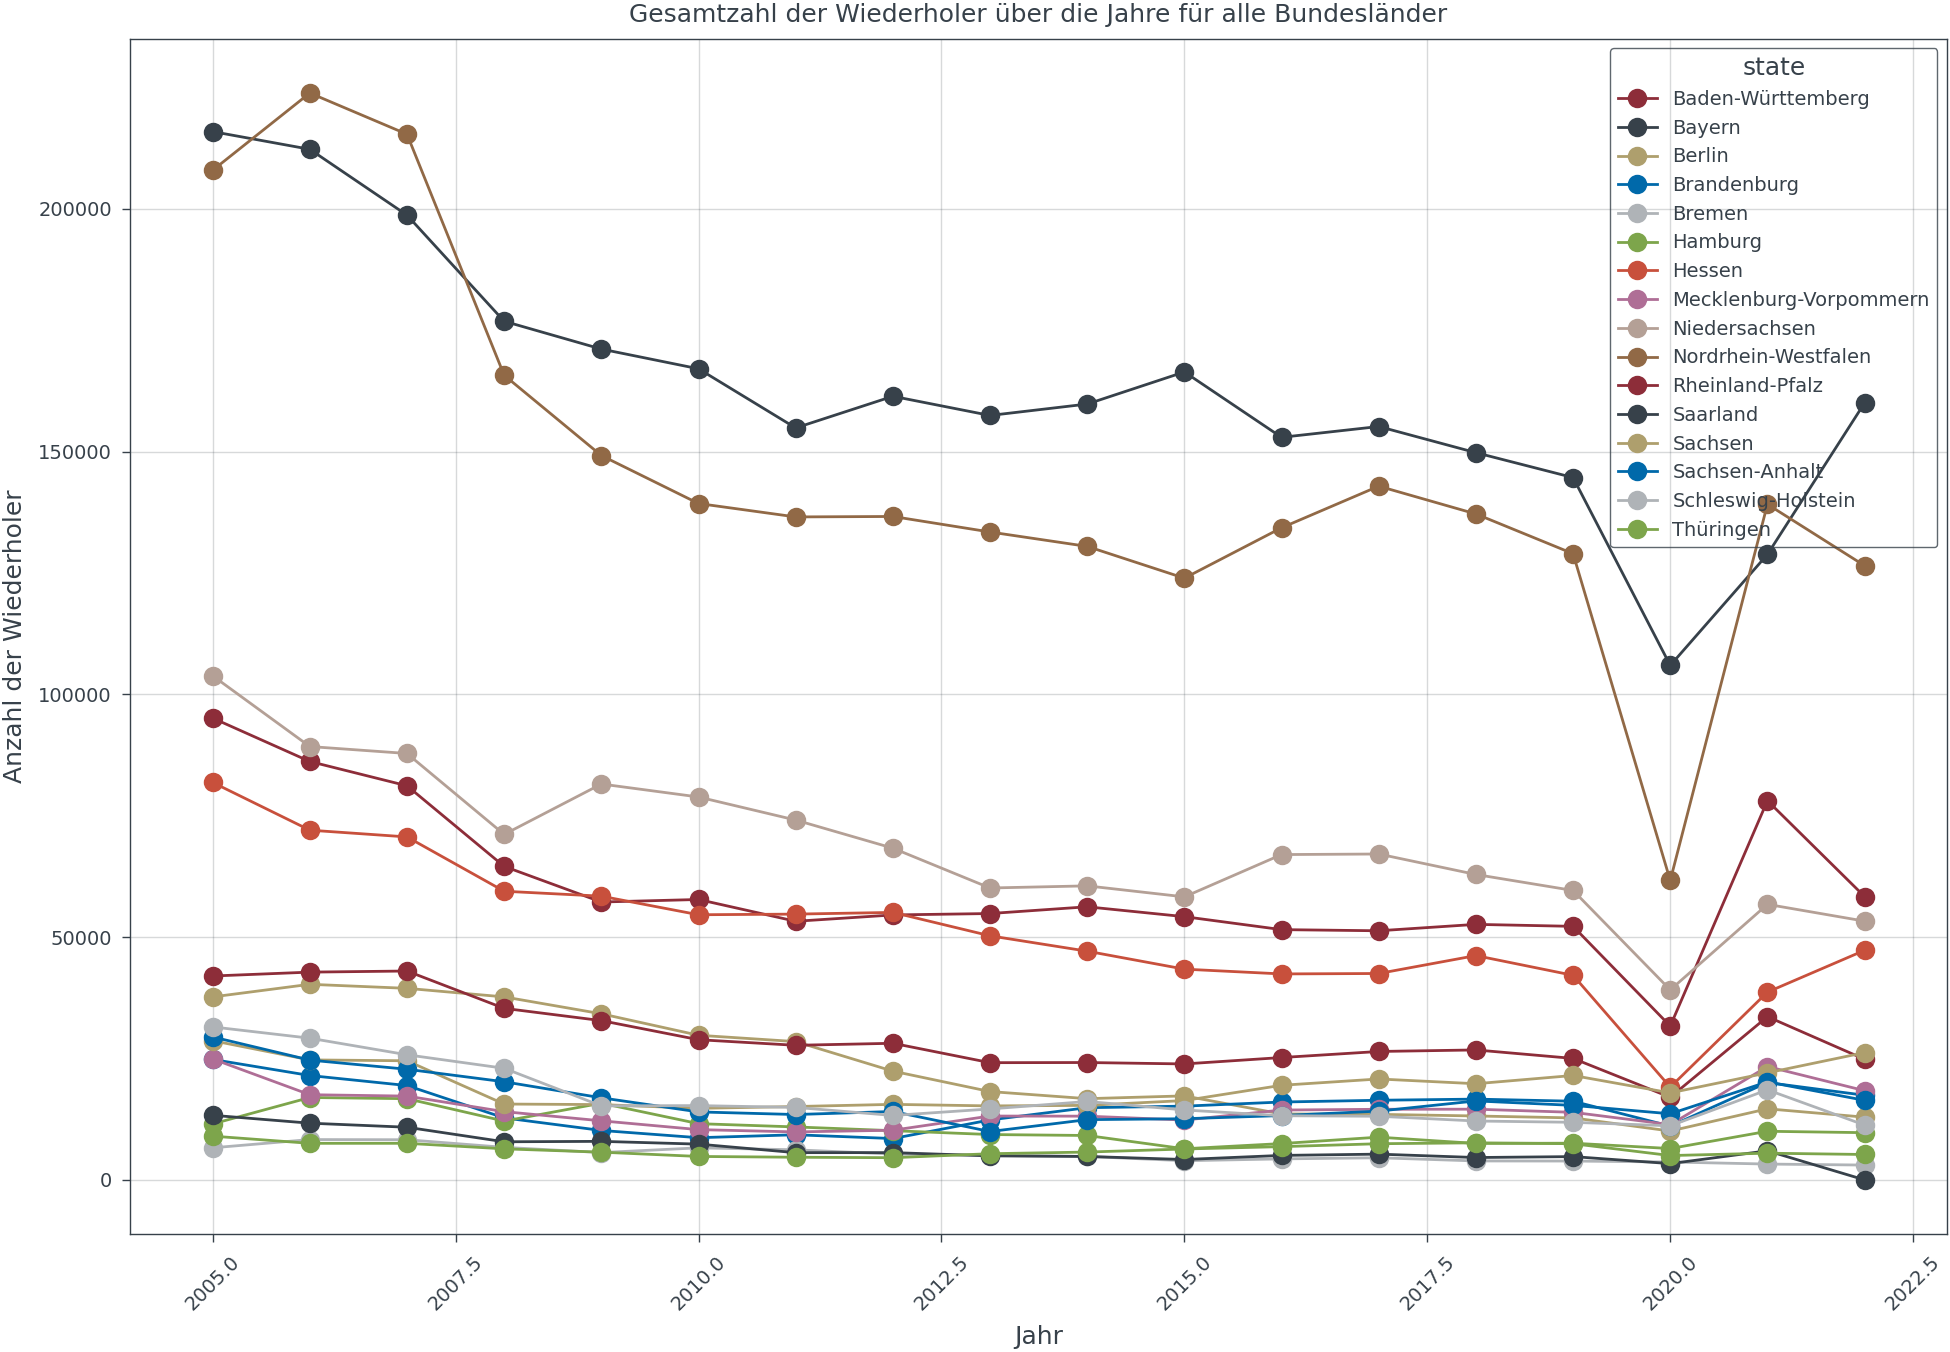

In [5]:
import matplotlib.pyplot as plt

# Umwandlung der Daten in numerische Werte, falls notwendig
melted_df['male'] = pd.to_numeric(melted_df['male'], errors='coerce')
melted_df['female'] = pd.to_numeric(melted_df['female'], errors='coerce')
melted_df['total'] = pd.to_numeric(melted_df['total'], errors='coerce')

# Erstellen Sie eine Gruppierung nach 'year' und 'state', um die Gesamtzahl zu summieren
total_repeaters_by_year_state = melted_df.groupby(['year', 'state'])['total'].sum().unstack()

# Plot der Gesamtzahl der Wiederholer über die Jahre für alle Bundesländer
total_repeaters_by_year_state.plot(kind='line', marker='o', figsize=(10, 7))
plt.title('Gesamtzahl der Wiederholer über die Jahre für alle Bundesländer')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Wiederholer')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

<function matplotlib.pyplot.show(close=None, block=None)>

findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

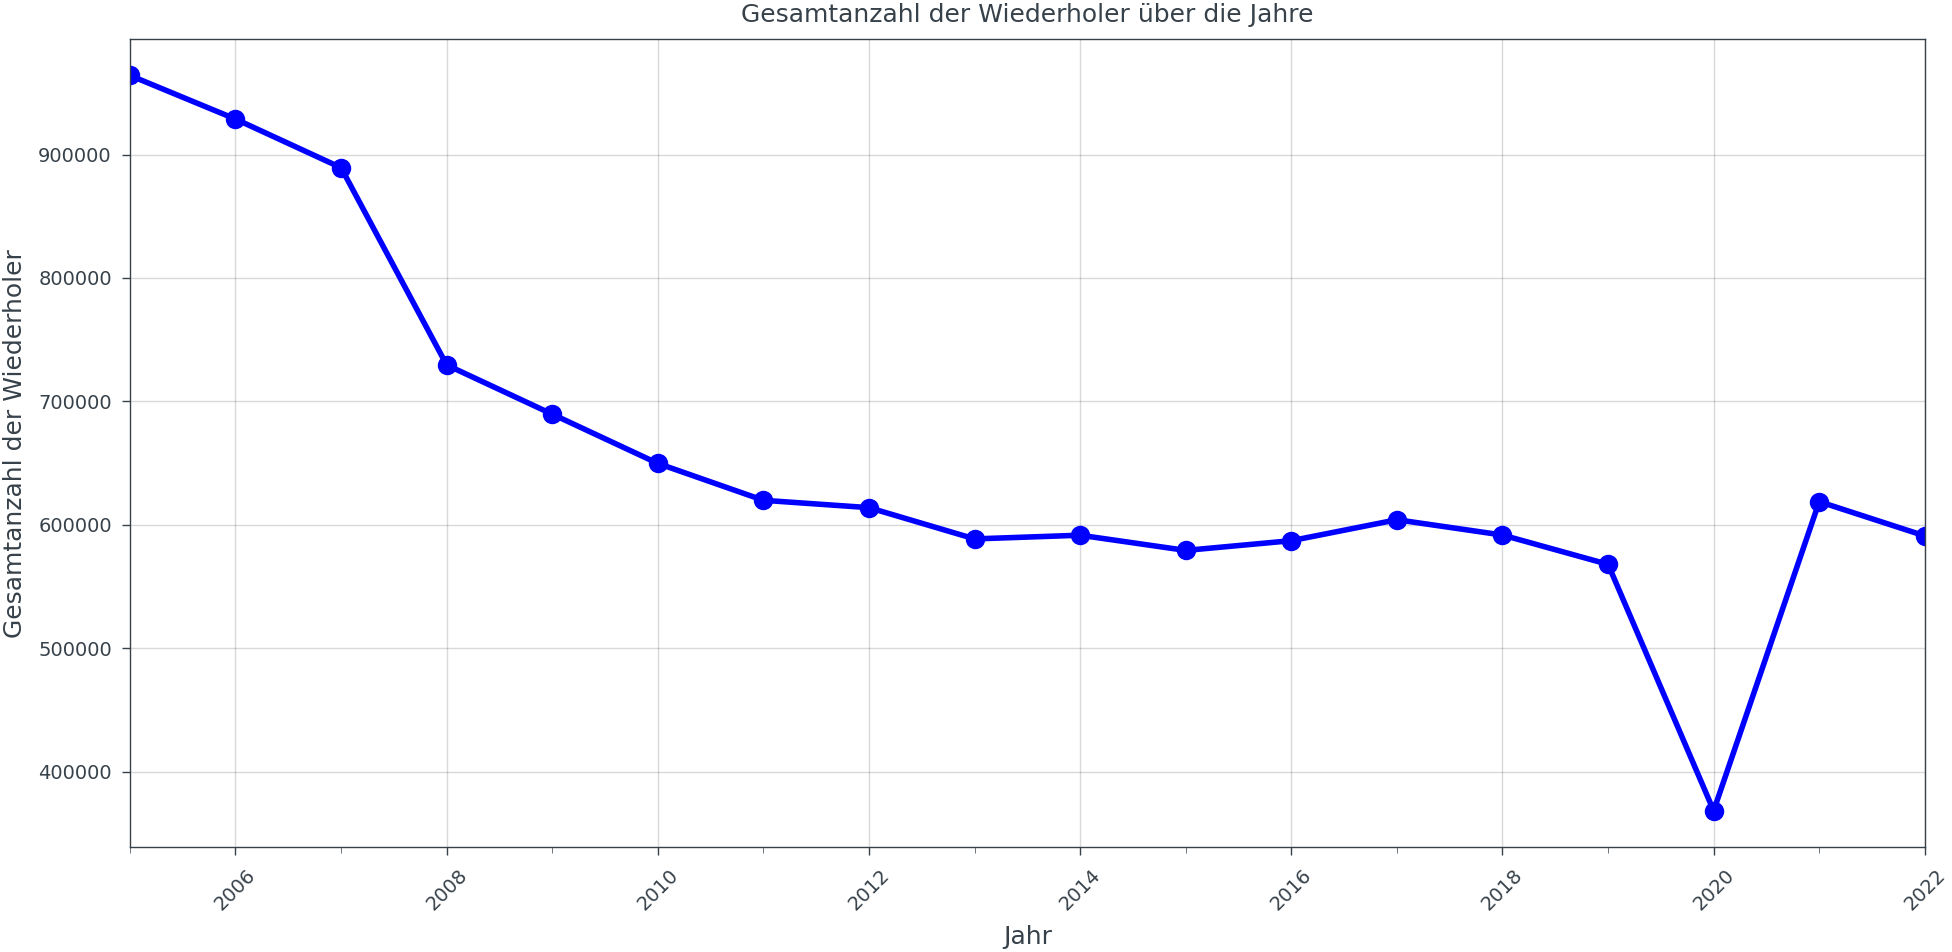

In [6]:
import matplotlib.pyplot as plt

# Wir konvertieren die 'year' Spalte in ein DateTime-Format, um sie besser sortieren zu können
melted_df['year'] = pd.to_datetime(melted_df['year'], format='%Y')

# Summe der 'total' Werte über die Jahre
total_over_years = melted_df.groupby('year')['total'].sum()

# Erstellen des Plots für die Gesamtanzahl über die Jahre
plt.figure(figsize=(10, 5))
total_over_years.plot(kind='line', marker='o', color='blue', linewidth=2)
plt.title('Gesamtanzahl der Wiederholer über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Gesamtanzahl der Wiederholer')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Stellt sicher, dass alles gut im Plot passt
plt.show


findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the following families were found: Roboto Condensed
findfont: Generic family 'sans-serif' not found because none of the foll

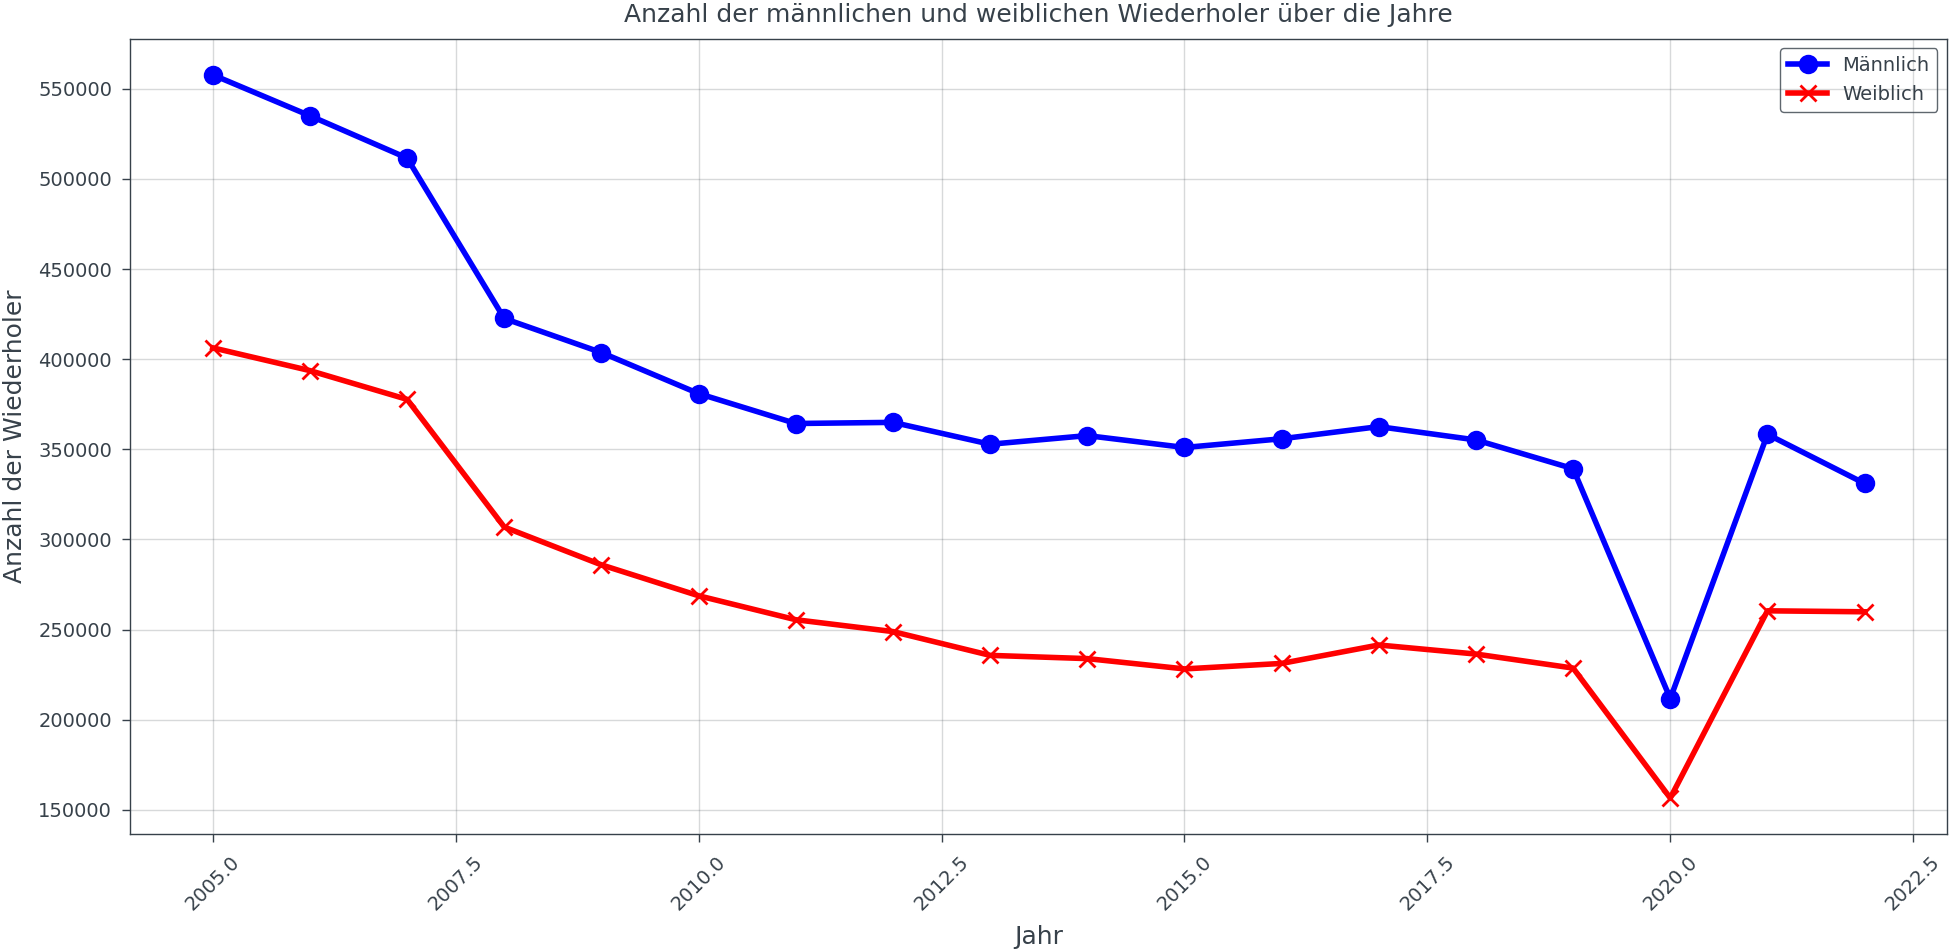

In [7]:
# Berechnung der Summe der männlichen und weiblichen Wiederholer über die Jahre
male_over_years = melted_df.groupby(melted_df['year'].dt.year)['male'].sum()
female_over_years = melted_df.groupby(melted_df['year'].dt.year)['female'].sum()

# Erstellen des Plots für männliche und weibliche Wiederholer über die Jahre
plt.figure(figsize=(10, 5))
male_over_years.plot(kind='line', marker='o', color='blue', linewidth=2, label='Männlich')
female_over_years.plot(kind='line', marker='x', color='red', linewidth=2, label='Weiblich')
plt.title('Anzahl der männlichen und weiblichen Wiederholer über die Jahre')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Wiederholer')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()  # Stellt sicher, dass alles gut im Plot passt
plt.show()


In [10]:
from school_analysis.preprocessing.load import Loader



loader = Loader()
special_edu_support = loader.load('students_with_special_educational_support')
number_of_repeaters = loader.load('number_of_repeaters')
graduates = loader.load('graduates')

#special_edu_support
#number_of_repeaters
graduates

,state,school,year,male,female,total
0,Baden-Württemberg,Secondary general schools,2007,956,586,1542
1,Baden-Württemberg,Secondary general schools,2008,735,510,1245
2,Baden-Württemberg,Secondary general schools,2009,784,491,1275
3,Baden-Württemberg,Secondary general schools,2010,679,443,1122
4,Baden-Württemberg,Secondary general schools,2011,675,439,1114
...,...,...,...,...,...,...
15227,Thüringen,Total,2010,702,455,1157
15228,Thüringen,Total,2011,675,349,1024
15229,Thüringen,Total,2012,729,448,1177
15230,Thüringen,Total,2013,714,404,1118
